### Telco Churn Customer Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\AVINASH\Desktop\Customer Churn\Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# replace empty strings in 'TotalCharges' with '0' and convert to float

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", '0').astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df['customerID'].duplicated().sum()

np.int64(0)

In [10]:
# Convert 'SeniorCitizen' from numeric to categorical
# Assuming 'SeniorCitizen' is 1 for Yes and 0 for No

def conv(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

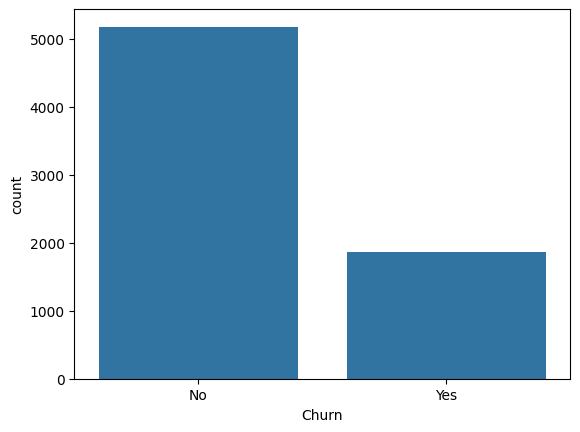

In [11]:
# Plotting the count of churned vs non-churned customers

sns.countplot(x='Churn', data=df)
plt.show()

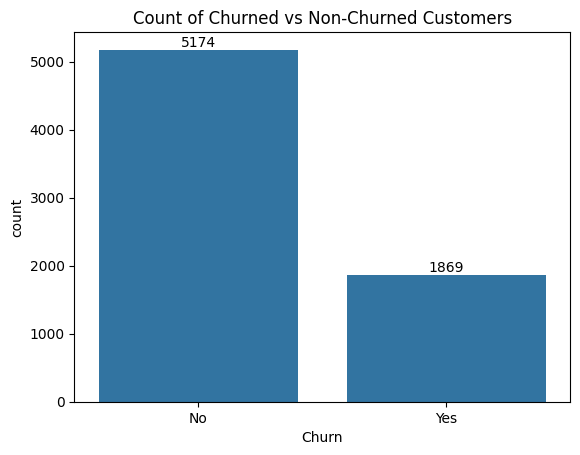

In [12]:
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Churned vs Non-Churned Customers')
plt.show()

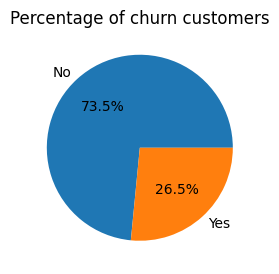

In [ ]:
# Plotting the percentage of churned customers who are churned vs not churned

plt.figure(figsize=(3, 6))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.1f%%')
plt.title('Percentage of churn customers')
plt.show()

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

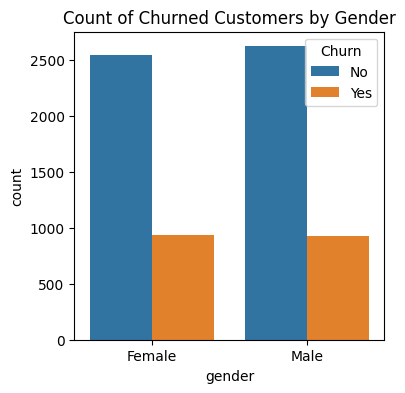

In [22]:
# Plotting the count of churned customers by gender

plt.figure(figsize=(4,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Count of Churned Customers by Gender')
plt.title

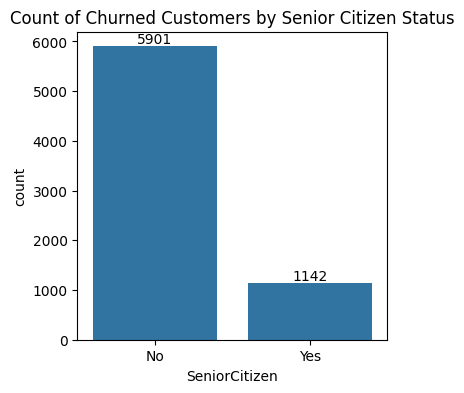

In [ ]:
# Plotting the count of churned customers by gender

plt.figure(figsize=(4, 4))
ax = sns.countplot(x='SeniorCitizen', data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Churned Customers by Senior Citizen Status')
plt.title
plt.show()

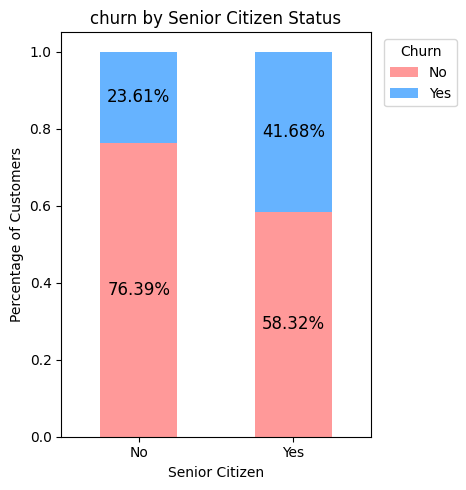

In [34]:
total_count = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
fig, ax = plt.subplots(figsize=(5, 5))
total_count.plot(kind='bar', stacked=True, ax=ax,color=['#FF9999', '#66B3FF'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()  # Get the x and y coordinates of the rectangle
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center', fontsize=12)
plt.title('churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=0)  
plt.legend(title='Churn', loc='upper right',bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

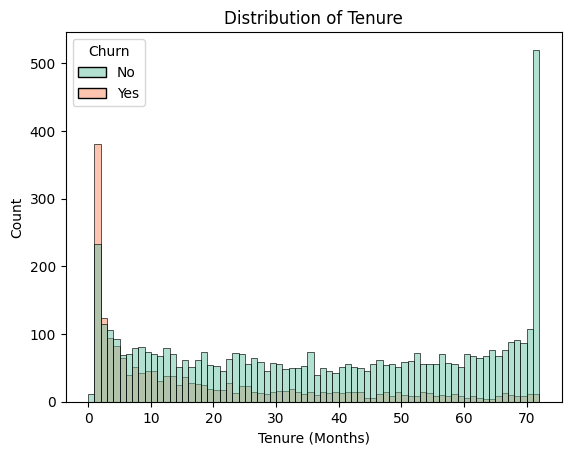

In [58]:
plt.Figure(figsize=(15, 5))
sns.histplot(x='tenure', data=df,bins=72,hue='Churn', palette='Set2')
plt.title('Distribution of Tenure')
plt.Figure(figsize=(9,4))
plt.xlabel('Tenure (Months)')
plt.show()

In [ ]:
# people who churned have a lower tenure compared to those who did not churn

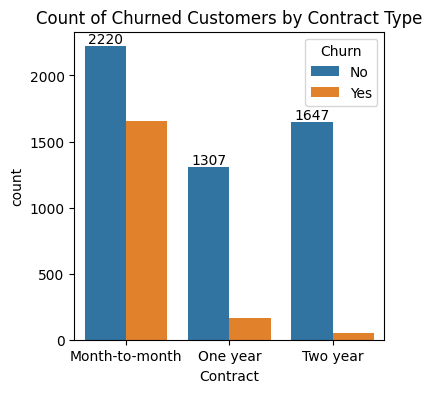

In [61]:

plt.figure(figsize=(4, 4))
ax = sns.countplot(x='Contract', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Churned Customers by Contract Type')
plt.title
plt.show()

In [ ]:
# people who have a month-to-month contract are more likely to churn compared to those with one year or two year contracts

In [62]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

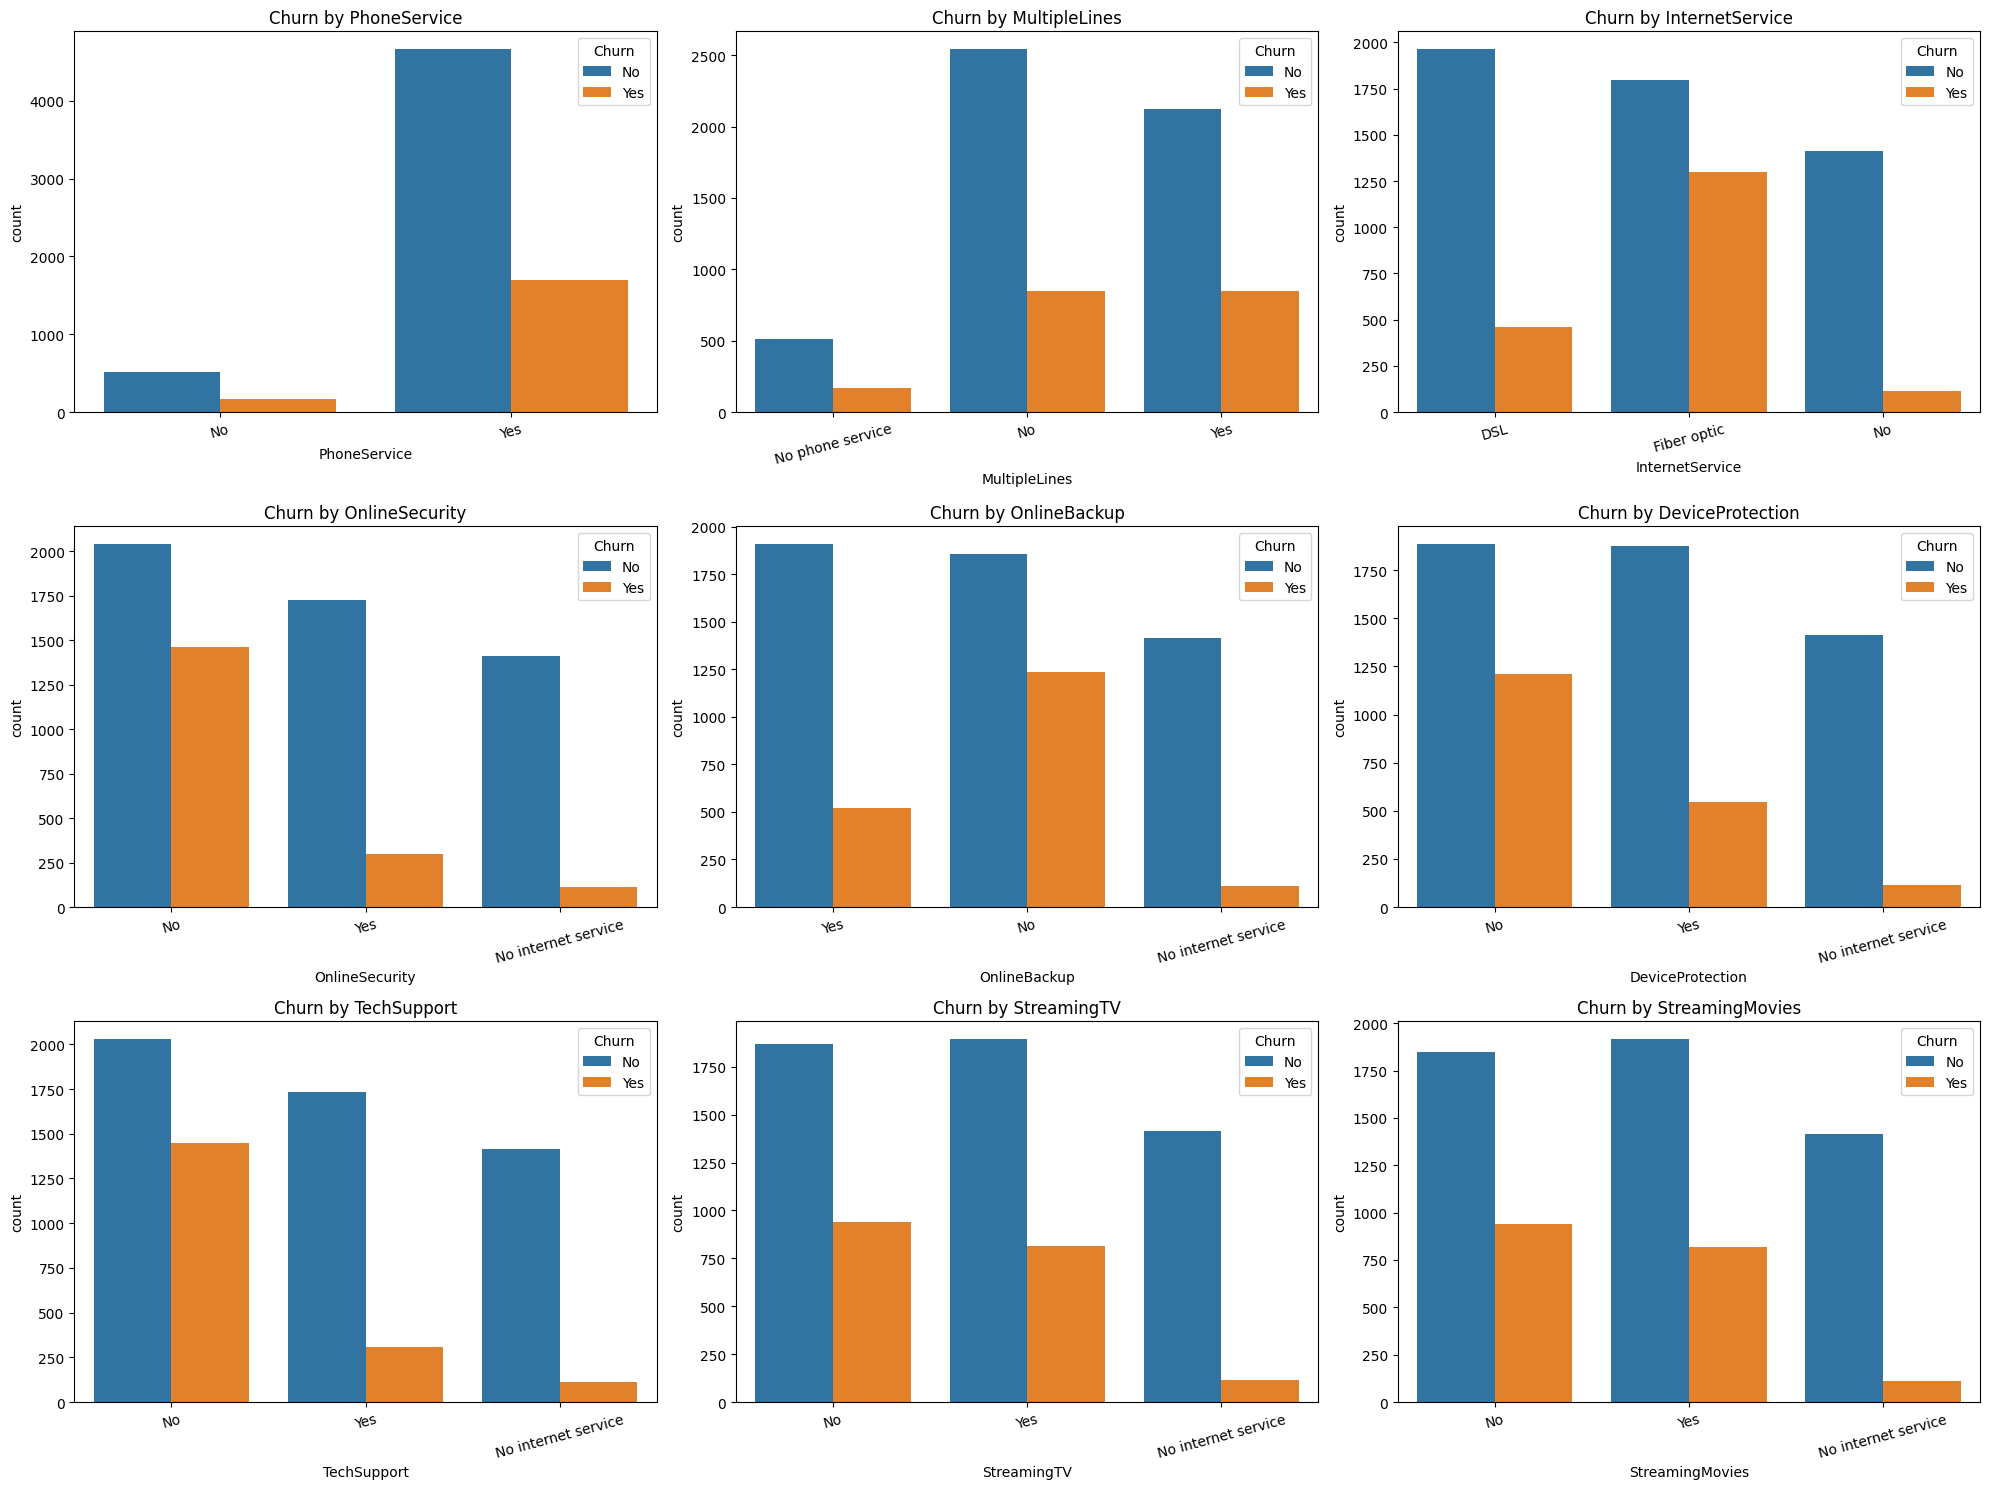

In [64]:

# Set up the columns to plot
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define layout for subplots
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # Round up

# Set figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,15))
axes = axes.flatten()  # Flatten 2D array for easy indexing

# Create each countplot
for i, col in enumerate(cols):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].tick_params(axis='x', rotation=15)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
## The visual analysis reveals that customers are less likely to churn when they subscribe to value-added services. Those with multiple lines, streaming services (TV and movies), online security, backup, device protection, and tech support show significantly lower churn rates. These features likely increase customer satisfaction and perceived value, encouraging retention. Conversely, customers without these services are more prone to leave. Notably, users of fiber optic internet exhibit the highest churn, suggesting possible issues with service quality, pricing, or competitive alternatives. In contrast, DSL and non-internet users churn less. Overall, bundling useful and engaging services appears to be a key strategy in reducing customer churn.


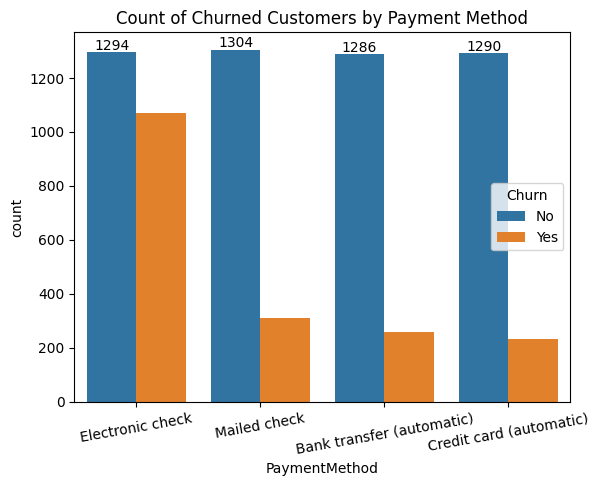

In [74]:
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.Figure(figsize=(20,5), dpi=100)
plt.xticks(rotation=10)
plt.title('Count of Churned Customers by Payment Method')
plt.show()

In [75]:
# customers who pay by electronic check are more likely to churn compared to those who pay by credit card, bank transfer, or mailed check
